<a href="https://colab.research.google.com/github/rezar12/ANN/blob/master/CHIFFREKH.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**RECONNAISSANCE D'UNE ECRITURE MANUSCRIPTE**

Pour cet exemple nous utilisons la base de données de la librairie Keras contenant des ecrits manuscrits de chriffres ...

In [ ]:
from keras.datasets import mnist

In [ ]:
df = mnist.load_data()
#charge les donner dentrainnement et de test

11501568/11490434 [==============================] - 0s 0us/step


## affichage du contenue de notre base de données 

In [ ]:
# creation d'une function generatrice de nombre d'indice aleatoire pour le subploting
import random

def generate(n : int, lenOfElement : int) -> list:
    elementsListe = []
    for i in range(n):
        elementsListe.append(random.randint(0,lenOfElement))
    return elementsListe

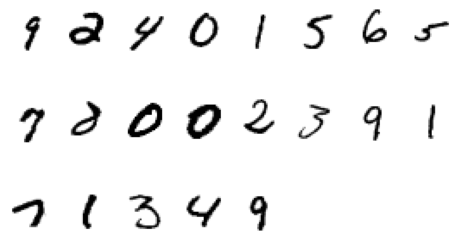

In [ ]:
# xecuté plusieur fois pour que le plot change 
# ce-ci vous donnes un appercu des données 
# affichage de quelque pictorane des ecrits manuscrit ...

import matplotlib.pyplot as plt

# creation d'un axe de multi ploting on decide d'affiché 20 image aleatoire:
def plotting(subplotting : int, lenListe : int,grilleAffiche : list ) -> None:
    nplots = subplotting
    liste = generate(subplotting,lenListe)
    fig = plt.figure(figsize=(8,8))
    for j in range(nplots):
        plt.subplot(grilleAffiche[0],grilleAffiche[1],j+1)
        plt.imshow(df[0][0][liste[j]], cmap='binary')
        plt.axis('off')
    plt.show()

if __name__ =="__main__":
    try:
        plotting(21,60000,[5,8])
    except ValueError:
        print("AJUSTER LA GRILLE")


#**MISE EN PLACE DU MODEL [reseau de neuronnes]**

## **IMPORTATION DE LIBRAIRIES**

In [ ]:
import keras # importation du module keras https://keras.io/getting_started/
import numpy as np 
import pandas as pd
import tensorflow as tf # impotimise keras via tensorflow qui est devoleppe par google
from keras.datasets import mnist # jeu de données de chiffre manuscrit en digit [matrice (array)]
from keras.models import Sequential # classe pour la mise en place du reseau de neronnes 
from keras.layers import Dense, Dropout, Flatten # Dense permet l'interconnexion de neronnes , Dropout casse le phenomene de surapprentissage, Flatten permet d'applatir les couches
from keras.layers import Conv2D, MaxPool2D # https://keras.io/api/layers/pooling_layers/max_pooling2d/

## **CONTRUCTION DU TRAINTSET ET TESTSET**

In [ ]:

(X_train, y_train), (X_test, y_test) = mnist.load_data() # CHARGEMENT DES DONNEES DEPUIS MNIST
#elle contien 70000 images de 28px/28px
#60000 image for training and 10000 for test 
print(X_train.shape, y_train.shape) # taille du train 
 

(60000, 28, 28) (60000,)


In [ ]:
print(X_test.shape, y_test.shape) 

(10000, 28, 28) (10000,)


In [ ]:
# transposition  
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1) #ici
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)

In [ ]:
# taille entrer du reseau
input_shape = (28, 28, 1)

In [ ]:
# [0,...,9] = 10 classe
num_classes= 10

In [ ]:
# passe des matrice en un format categorique 
y_train = tf.keras.utils.to_categorical(y_train, num_classes)
y_test = tf.keras.utils.to_categorical(y_test, num_classes)

In [ ]:
# retypage 
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

# binarisation de l'image 
X_train /= 255
X_test /= 255

In [ ]:
# mise en place du reseau de neuronne ( modele)
model = Sequential()
# premiere couche [couche d'entrée (input layer)]
model.add(Conv2D(filters=32, kernel_size=3, activation="relu", padding='same',input_shape=input_shape)) # fonction lien https://www.actuia.com/faq/que-signifie-relu-en-matiere-dintelligence-artificielle/#:~:text=ReLU%20est%20une%20fonction%20d,les%20r%C3%A9sultats%20n%C3%A9gatifs%20par%20z%C3%A9ro.
model.add(MaxPool2D())
# premiere couche intermediaire [hidden layer]
model.add(Conv2D(filters=64, kernel_size=3, activation="relu", padding='same'))
model.add(MaxPool2D())
# 2eme couche intermediaire [hidden layer]
model.add(Conv2D(filters=128, kernel_size=3, activation="relu", padding='same'))
model.add(MaxPool2D())
model.add(Flatten())
# couche intermediaire [hidden layer]
model.add(Dense(units=256, activation="relu"))
model.add(Dropout(0.3)) # evité l'overfitting (surapprentissage)

model.add(Dense(units=num_classes, activation="softmax")) #https://www.actuia.com/faq/a-quoi-sert-softmax/#:~:text=La%20fonction%20math%C3%A9matique%20softmax%20peut,l'objet%20soit%20une%20pomme.

In [ ]:
# parametrage du modele
model.compile(
    loss=keras.losses.categorical_crossentropy,
    optimizer= tf.keras.optimizers.Adam(),
    metrics=['accuracy'])

In [ ]:
# execution 
history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    batch_size=128,
    epochs=20,
    verbose=1,
) 

Epoch 1/20
469/469 [==============================] - 86s 182ms/step - loss: 0.2004 - accuracy: 0.9377 - val_loss: 0.0430 - val_accuracy: 0.9851
Epoch 2/20
469/469 [==============================] - 85s 181ms/step - loss: 0.0474 - accuracy: 0.9855 - val_loss: 0.0308 - val_accuracy: 0.9894
Epoch 3/20
469/469 [==============================] - 85s 181ms/step - loss: 0.0331 - accuracy: 0.9898 - val_loss: 0.0290 - val_accuracy: 0.9908
Epoch 4/20
469/469 [==============================] - 85s 180ms/step - loss: 0.0265 - accuracy: 0.9917 - val_loss: 0.0252 - val_accuracy: 0.9918
Epoch 5/20
469/469 [==============================] - 85s 181ms/step - loss: 0.0217 - accuracy: 0.9930 - val_loss: 0.0280 - val_accuracy: 0.9910
Epoch 6/20
469/469 [==============================] - 84s 180ms/step - loss: 0.0185 - accuracy: 0.9938 - val_loss: 0.0290 - val_accuracy: 0.9916
Epoch 7/20
469/469 [==============================] - 84s 180ms/step - loss: 0.0145 - accuracy: 0.9953 - val_loss: 0.0209 - val_ac

# Performance du models

In [ ]:
# affichage des score 
score = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])
#accuracy performance du model ,lost perte 

Test loss: 0.03362875431776047
Test accuracy: 0.993399977684021


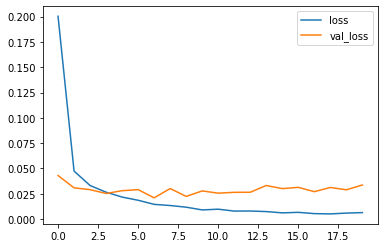

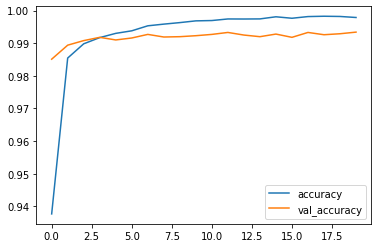

In [ ]:
history_frame = pd.DataFrame(history.history)
history_frame.loc[:, ['loss', 'val_loss']].plot()
history_frame.loc[:, ['accuracy', 'val_accuracy']].plot()

l'observation des grahes montre l'absence d'overfitting 😁

# Fonction pour le Test

In [ ]:
# definir un intervale de valeur a selectioné dans notre Testset
def intervaleTest(ends : int) -> tuple:
    
    chiffre = np.squeeze(X_test[:ends])
    prediction = model.predict(X_test[:ends])
    yield (prediction,chiffre)

In [ ]:
def Test(nombre : int = 1) -> None:
    for el in intervaleTest(nombre):
        for i in range(len(el[0])):
            valeur_predite = np.argmax(el[0][i])
            vraie_valeur = np.argmax(y_test[i])
            print(f'valeur predite : {valeur_predite}')
            print(f'vraie valeur : {vraie_valeur}')
            plt.imshow(el[1][i],cmap='binary')
            plt.show()
 



# **TESTONS LE MODELS**

valeur predite : 7
vraie valeur : 7


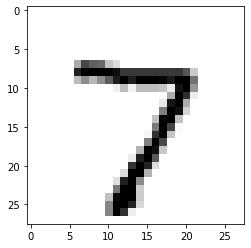

valeur predite : 2
vraie valeur : 2


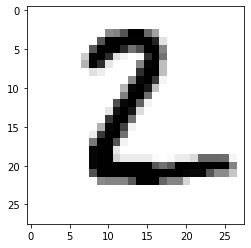

valeur predite : 1
vraie valeur : 1


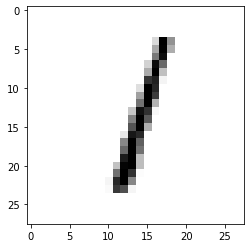

valeur predite : 0
vraie valeur : 0


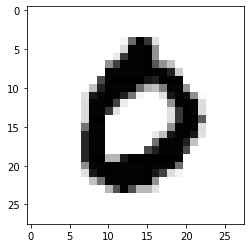

valeur predite : 4
vraie valeur : 4


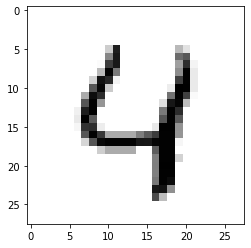

valeur predite : 1
vraie valeur : 1


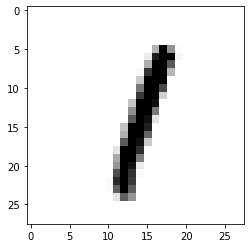

valeur predite : 4
vraie valeur : 4


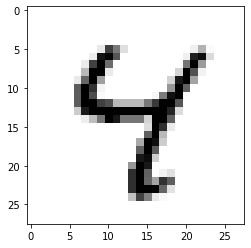

valeur predite : 9
vraie valeur : 9


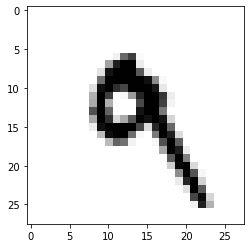

valeur predite : 5
vraie valeur : 5


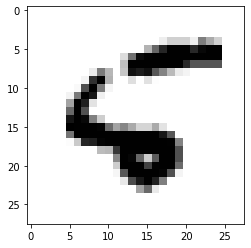

valeur predite : 9
vraie valeur : 9


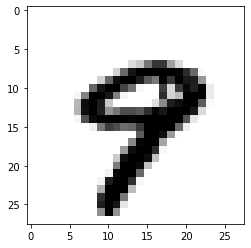

valeur predite : 0
vraie valeur : 0


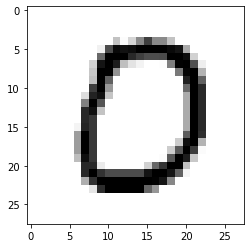

valeur predite : 6
vraie valeur : 6


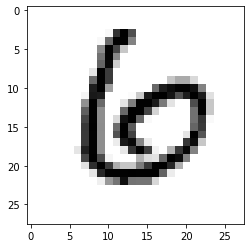

In [ ]:
# on test avec les 12 première valeur de nos données de test vous pouvez les etendres
Test(12)

redaction d'une boucle for qui prendra un bach-size d'un certain nombres d'elements puis par iteration des vraies valeurs et de la valeurs predicts doté d'une variable number au quelle on applique une function squeeze() de la librairie numpy pour eviter les problemes de formatage en entrée on obtient quelque chose qui donne le resultat esperé le vrai resultat et une image du nombre attendu ...
NB:la fonction argmax() permet de retourné la classe derrière une transformation categorielle ...
